# Exercice semaine 4: Correction tests multiples et biomarqueurs

## Chargement des libraries

In [34]:
import pandas as pd
import plotly.express as px
import numpy as np
import os
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
from sksurv.compare import compare_survival

## Partie 1 : Introduction aux tests multiples

1) Faîtes 1000 t-tests entre des distributions normales centrées réduites de taille 30 générées aléatoirement. Afficher les deux dernières distributions générées.

In [35]:
resRandom = list()
for g in range(1000):
    group1 = np.random.normal(loc=0.0, scale=1.0, size=30)
    group2 = np.random.normal(loc=0.0, scale=1.0, size=30)
    diff = np.mean(group2) - np.mean(group1)
    t, p = stats.ttest_ind(group1, group2,equal_var = True) 
    #t, p  = stats.wilcoxon(x = group1, y = group2) 
    resRandom.append([g,diff,t,p])

In [36]:
fig = px.histogram(group1,nbins=10)
fig.show()

In [37]:
fig = px.histogram(group2,nbins=10)
fig.show()

2) Obtenez vous des différences significatives (p-valeur < 0.05)?

In [38]:
resRandomTable = pd.DataFrame(resRandom, columns = ['test_number', 'diff',"T stat","p_value"])
resRandomTable[resRandomTable['p_value'] < 0.05].sort_values("p_value")

,test_number,diff,T stat,p_value
996,996,0.891141,-3.467803,0.000995
144,144,-0.742720,3.261776,0.001857
154,154,-0.736322,3.161906,0.002493
818,818,-0.713869,3.041477,0.003532
872,872,0.848473,-2.959615,0.004455
231,231,0.756927,-2.930317,0.004836
249,249,-0.662157,2.902729,0.005223
332,332,0.644645,-2.890849,0.005398
396,396,0.695471,-2.839324,0.006223
280,280,-0.599161,2.782730,0.007263


In [39]:
len(resRandomTable[resRandomTable['p_value'] < 0.05].sort_values("p_value"))

55

3) Effectuer la correction de Benjamin et Hotchberg pour déterminer les différences significatives pour ces 1000 tests (on prendra un seuil initial sigma de 0.05).

In [40]:
resRandomTable = resRandomTable.sort_values("p_value")
resRandomTable["corrected_threshold"]=[(r/len(resRandomTable))*0.05 for r in range(len(resRandomTable)+1)[1:]]
resRandomTable['H0 rejected'] = resRandomTable['p_value'] < resRandomTable['corrected_threshold']
resRandomTable

,test_number,diff,T stat,p_value,corrected_threshold,H0 rejected
996,996,0.891141,-3.467803,0.000995,0.00005,False
144,144,-0.742720,3.261776,0.001857,0.00010,False
154,154,-0.736322,3.161906,0.002493,0.00015,False
818,818,-0.713869,3.041477,0.003532,0.00020,False
872,872,0.848473,-2.959615,0.004455,0.00025,False
...,...,...,...,...,...,...
949,949,0.001270,-0.004527,0.996404,0.04980,False
808,808,-0.000820,0.003355,0.997335,0.04985,False
480,480,-0.000667,0.002538,0.997983,0.04990,False
529,529,-0.000571,0.002245,0.998217,0.04995,False


#### Remarque sur le code:
Nous avons utilisé ici (et nous utiliserons plus tard dans l'exercice) une liste en compréhension pour écrire de manière synthétique une boucle for: `[(r/len(resRandomTable))*0.05 for r in range(len(resRandomTable)+1)[1:]]`. Le code équivalent avec une boucle for classique, beaucoup plus long à écrire, est le suivant:

In [41]:
corrected_threshold_list = [] #déclaration d'une liste vide
for r in range(len(resRandomTable)+1)[1:]: # range fait partir la séquence à 0 mais notre premier rang est 1
    corrected_threshold = (r/len(resRandomTable))*0.05 #calcul du nouveau seuil pour le rang donné
    corrected_threshold_list.append(corrected_threshold) #ajout du seuil à la liste
    
resRandomTable["corrected_threshold_2"] = corrected_threshold_list
resRandomTable

,test_number,diff,T stat,p_value,corrected_threshold,H0 rejected,corrected_threshold_2
996,996,0.891141,-3.467803,0.000995,0.00005,False,0.00005
144,144,-0.742720,3.261776,0.001857,0.00010,False,0.00010
154,154,-0.736322,3.161906,0.002493,0.00015,False,0.00015
818,818,-0.713869,3.041477,0.003532,0.00020,False,0.00020
872,872,0.848473,-2.959615,0.004455,0.00025,False,0.00025
...,...,...,...,...,...,...,...
949,949,0.001270,-0.004527,0.996404,0.04980,False,0.04980
808,808,-0.000820,0.003355,0.997335,0.04985,False,0.04985
480,480,-0.000667,0.002538,0.997983,0.04990,False,0.04990
529,529,-0.000571,0.002245,0.998217,0.04995,False,0.04995


4) Reste-t-il des différences significatives pour ces nouveaux seuils? Si oui, dans quelle proportion par rapport au nombre de tests effectués (1000)?

In [42]:
resRandomTable[resRandomTable['H0 rejected']]

,test_number,diff,T stat,p_value,corrected_threshold,H0 rejected,corrected_threshold_2


5) Effectuer la même correction pour les tests de différences d'expression réalisés lors de la séance précédente.

Commencer par charger le tableau des résultats sauvegardés précedemment. Combien de gènes sont à priori différentiellement exprimés (on prendra p_value < 0.05) entre les echantillons métastatiques et les echantillons de tumeurs primaires?

In [43]:
diffExpResults = pd.read_csv("../Week4/diffExpMetastaticPrimaryTumor_chr14.csv")
diffExpResults[diffExpResults["p_value"]< 0.05]

,Ensembl_ID,log1p_diff,T stat,p_value,gene_name
0,ENSG00000215398.10,-0.016788,-2.752333,6.725146e-03,RP11-754I20.1
9,ENSG00000257115.1,-0.004267,-2.062118,4.110023e-02,OR11H12
43,ENSG00000244306.8,-0.115900,-2.084979,4.015687e-02,LINC01296
65,ENSG00000258080.1,-0.001736,-2.592771,1.056170e-02,ARHGAP42P4
73,ENSG00000258564.1,-0.004920,-2.497437,1.370230e-02,OR4N1P
...,...,...,...,...,...
2280,ENSG00000254176.1,-0.185423,-2.181168,3.117287e-02,IGHV3-75
2281,ENSG00000253247.1,-0.401323,-3.388917,9.851175e-04,IGHV3-76
2283,ENSG00000265929.1,-0.756539,-5.248022,4.380960e-07,MIR5195
2284,ENSG00000211978.2,-1.012137,-5.490279,1.926521e-07,IGHV5-78


In [44]:
## Solution
len(diffExpResults[diffExpResults["p_value"]< 0.05])

627

Puis réaliser la correction comme précédemment.

In [45]:
## Solution
diffExpResults = diffExpResults.sort_values("p_value")

diffExpResults["corrected_threshold"]=[(r/len(diffExpResults))*0.05 for r in range(len(diffExpResults)+1)[1:]]
diffExpResults['H0 rejected'] = diffExpResults['p_value'] < diffExpResults['corrected_threshold']
diffExpResults

,Ensembl_ID,log1p_diff,T stat,p_value,gene_name,corrected_threshold,H0 rejected
2135,ENSG00000211911.1,-1.338808,-8.223607,4.256752e-14,IGHD3-22,0.000022,True
2172,ENSG00000211941.3,-3.033411,-7.740083,5.362804e-12,IGHV3-11,0.000044,True
2188,ENSG00000253957.1,-0.560431,-7.269396,1.421840e-11,IGHV3-22,0.000066,True
2112,ENSG00000211898.6,-1.856373,-7.246155,1.861155e-11,IGHD,0.000087,True
1407,ENSG00000259124.1,-0.238446,-7.050480,6.088311e-11,RP11-187O7.3,0.000109,True
...,...,...,...,...,...,...,...
2108,ENSG00000278556.1,0.000000,NaN,NaN,AL122127.3,0.049913,False
2121,ENSG00000211900.2,0.000000,NaN,NaN,IGHJ6,0.049934,False
2123,ENSG00000242472.1,0.000000,NaN,NaN,IGHJ5,0.049956,False
2124,ENSG00000240041.1,0.000000,NaN,NaN,IGHJ4,0.049978,False


6) Combien de gènes différentiellement exprimés reste-t-il après cette correction?

In [46]:
diffExpResults[diffExpResults['H0 rejected']].sort_values('log1p_diff')

,Ensembl_ID,log1p_diff,T stat,p_value,gene_name,corrected_threshold,H0 rejected
2113,ENSG00000211899.6,-3.438130,-6.360826,1.361990e-08,IGHM,0.000393,True
2191,ENSG00000211949.3,-3.328866,-5.992284,5.759279e-08,IGHV3-23,0.000721,True
2183,ENSG00000211945.2,-3.140367,-5.387288,7.618754e-07,IGHV1-18,0.001726,True
2172,ENSG00000211941.3,-3.033411,-7.740083,5.362804e-12,IGHV3-11,0.000044,True
2203,ENSG00000270550.1,-2.985253,-5.880781,8.498874e-08,IGHV3-30,0.000874,True
...,...,...,...,...,...,...,...
156,ENSG00000165794.8,1.366532,4.525664,4.768882e-05,SLC39A2,0.003626,True
1187,ENSG00000139988.8,1.555879,4.524924,3.581887e-05,RDH12,0.003539,True
163,ENSG00000165799.4,1.628900,4.693965,2.926148e-05,RNASE7,0.003386,True
1131,ENSG00000176153.11,1.667518,5.222255,4.967779e-06,GPX2,0.002468,True


## Partie 2: Analyse des biomarqueurs prédictifs de la survie des patients atteints de melanomes

Nous allons travailler sur le fichier d'expression génique de la cohorte de patients atteints de mélanome que nous avons normalisé en TPM (`'TCGA-SKCM.htseq_tpm.csv'`)la semaine dernière et nous aurons également besoin du fichier d'annotations des gènes (`'gencode.v22.annotation.gene.probeMap.with.length.csv'`).

Aujourd'hui, nous utiliserons en plus le fichier de suivi de la survie des patients de la cohorte (`'TCGA-SKCM.survival.tsv'`) que nous avons téléchargé à cette adresse: https://xenabrowser.net/datapages/?dataset=TCGA-SKCM.survival.tsv&host=https%3A%2F%2Fgdc.xenahubs.net&removeHub=https%3A%2F%2Fxena.treehouse.gi.ucsc.edu%3A443

Nous avons mis à votre disposition ces fichiers dans le dossier UCSC_data.

1) Charger ces fichiers dans des tableaux `smpCounts`, `geneAnnotation` et `survivalData`. Mettez en index (noms des lignes) la colonne `Ensembl_ID` pour `smpCounts`, `ìd` pour `geneAnnotations` et la colonne `sample`pour `survivalData`. On conservera la colonne d'index pour geneAnnotations et survivalData (option `drop=False`).

In [47]:
smpCounts = pd.read_csv('../UCSC_data/TCGA-SKCM.htseq_tpm.csv')
smpCounts = smpCounts.set_index('Ensembl_ID') #his will drop Ensembl_ID column
smpCounts

,TCGA-EE-A2GJ-06A,TCGA-EE-A2GI-06A,TCGA-WE-A8ZM-06A,TCGA-DA-A1IA-06A,TCGA-D3-A51H-06A,TCGA-XV-A9VZ-01A,TCGA-FS-A1ZE-06A,TCGA-D3-A51F-06A,TCGA-D3-A8GL-06A,TCGA-BF-A5EP-01A,...,TCGA-EE-A2GP-06A,TCGA-EE-A2M6-06A,TCGA-EE-A3AA-06A,TCGA-FS-A1ZF-06A,TCGA-D9-A6EC-06A,TCGA-FR-A8YC-06A,TCGA-EB-A4XL-01A,TCGA-EB-A551-01A,TCGA-EE-A3J4-06A,TCGA-EE-A3AC-06A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.13,5.492020,4.977245,5.686251,4.757404,2.896276,5.301672,3.461976,3.831496,3.257634,4.518998,...,5.462907,5.715717,2.391869,4.806537,5.116857,4.291547,5.300217,3.839361,4.953076,4.828908
ENSG00000000005.5,0.000000,0.080714,1.527938,0.000000,0.231093,0.950625,0.622636,0.050011,0.214703,0.048674,...,0.416431,0.222035,0.072866,0.153887,0.000000,0.246848,0.000000,0.000000,0.000000,0.000000
ENSG00000000419.11,5.523713,6.880899,6.772244,4.593481,5.942068,6.304230,6.840104,6.058202,7.133527,6.205951,...,6.885842,7.098479,7.013252,6.332303,7.159867,5.630500,5.661585,6.422101,5.906909,6.932407
ENSG00000000457.12,3.581697,3.684573,3.381051,2.580018,3.060895,3.472246,3.463646,2.999380,3.856717,2.408740,...,3.003973,2.610218,2.801962,3.428713,2.632950,3.355024,2.838872,2.727272,2.905733,3.779931
ENSG00000000460.15,3.514461,3.646168,2.500569,3.305690,2.613756,2.390197,2.825826,2.642469,3.841492,2.106094,...,3.156954,3.431138,3.542370,3.990699,2.928625,2.021066,2.125280,2.027202,2.524369,3.771591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000275287.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSGR0000276543.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSGR0000277120.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
geneAnnotations = pd.read_csv('../UCSC_data/gencode.v22.annotation.gene.probeMap.with.length.csv')
geneAnnotations = geneAnnotations.set_index('id') #this will drop Ensembl_ID column
geneAnnotations

,gene,chrom,chromStart,chromEnd,strand,gene_length
id,,,,,,
ENSG00000223972.5,DDX11L1,chr1,11869,14409,+,1735
ENSG00000227232.5,WASH7P,chr1,14404,29570,-,1351
ENSG00000278267.1,MIR6859-3,chr1,17369,17436,-,68
ENSG00000243485.3,RP11-34P13.3,chr1,29554,31109,+,1021
ENSG00000274890.1,MIR1302-9,chr1,30366,30503,+,138
...,...,...,...,...,...,...
ENSG00000198695.2,MT-ND6,chrM,14149,14673,-,525
ENSG00000210194.1,MT-TE,chrM,14674,14742,-,69
ENSG00000198727.2,MT-CYB,chrM,14747,15887,+,1141


Dans `survivalData` la colonne `OS` correspond au dernier status vital connu du patient: 1 s'il était mort, 0 s'il etait en vie.
La colonne `OS.time` correspond au temps de survie mesuré en jours du patient jusqu'à sa mort (si `OS=1`), jusqu'à la fin de l'étude s'il était à ce moment là toujours en vie, ou jusqu'à ce qu'il quitte l'étude avant la fin de celle ci (si `OS=0`).


In [49]:
survivalData = pd.read_table('../UCSC_data/TCGA-SKCM.survival.tsv',sep="\t")
survivalData = survivalData.set_index('sample')
survivalData

,OS,_PATIENT,OS.time
sample,,,
TCGA-RP-A690-06A,0,TCGA-RP-A690,6
TCGA-HR-A2OG-06A,0,TCGA-HR-A2OG,7
TCGA-RP-A693-06A,0,TCGA-RP-A693,10
TCGA-BF-A1PV-01A,0,TCGA-BF-A1PV,14
TCGA-EB-A82C-01A,0,TCGA-EB-A82C,17
...,...,...,...
TCGA-ER-A19G-06A,0,TCGA-ER-A19G,9188
TCGA-EE-A2GD-06A,1,TCGA-EE-A2GD,10346
TCGA-FS-A1ZC-06A,1,TCGA-FS-A1ZC,10870


La recherche des biomarqueurs de survie dans l'ensemble des gènes séquencés étant assez longue sur un ordinateur standard, nous ne travaillerons aujourd'hui qu'avec les gènes du chromosome 11.

2) En utilisant le tableau `geneAnnotations` ne conservez dans `smpCounts`que les gènes présents sur le chromosome 11

In [50]:
smpCounts = smpCounts.loc[geneAnnotations[geneAnnotations["chrom"] == "chr11"].index.to_list()]
smpCounts

,TCGA-EE-A2GJ-06A,TCGA-EE-A2GI-06A,TCGA-WE-A8ZM-06A,TCGA-DA-A1IA-06A,TCGA-D3-A51H-06A,TCGA-XV-A9VZ-01A,TCGA-FS-A1ZE-06A,TCGA-D3-A51F-06A,TCGA-D3-A8GL-06A,TCGA-BF-A5EP-01A,...,TCGA-EE-A2GP-06A,TCGA-EE-A2M6-06A,TCGA-EE-A3AA-06A,TCGA-FS-A1ZF-06A,TCGA-D9-A6EC-06A,TCGA-FR-A8YC-06A,TCGA-EB-A4XL-01A,TCGA-EB-A551-01A,TCGA-EE-A3J4-06A,TCGA-EE-A3AC-06A
Ensembl_ID,,,,,,,,,,,,,,,,,,,,,
ENSG00000253826.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000224777.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000254468.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000270921.1,0.000000,0.000000,0.065024,0.000000,0.036342,0.000000,0.026654,0.000000,0.000000,0.000000,...,0.039950,0.000000,0.000000,0.023652,0.000000,0.039002,0.063765,0.082351,0.000000,0.000000
ENSG00000230724.8,0.432452,0.211028,1.130904,0.185336,0.895027,1.007231,0.356998,0.884961,0.513986,0.490177,...,0.734953,0.372154,0.384525,0.899274,0.150108,1.001449,0.617866,1.512543,0.604252,0.615044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000255344.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.305082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000251226.1,0.000000,1.237527,0.000000,0.099129,0.027126,0.054947,0.000000,0.065221,2.528232,0.021474,...,0.000000,1.479591,0.094802,1.083476,0.023263,0.243056,0.000000,0.232443,0.000000,0.000000
ENSG00000255327.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


3) Ne conserver dans `smpCounts` et `survivalData` que les patients pour lesquels nous avons à la fois le suivie de la survie et l'expression génique et ordonner les patients avec le même ordre dans les deux tableaux (colonnes de `smpCounts` et index de `survivalData`).

In [51]:
smpCounts = smpCounts[smpCounts.columns.intersection(survivalData.index)]
survivalData = survivalData.loc[survivalData.index.intersection(smpCounts.columns)]
survivalData = survivalData.loc[smpCounts.columns]
survivalData

,OS,_PATIENT,OS.time
TCGA-EE-A2GJ-06A,1,TCGA-EE-A2GJ,2270
TCGA-EE-A2GI-06A,0,TCGA-EE-A2GI,1482
TCGA-WE-A8ZM-06A,0,TCGA-WE-A8ZM,3082
TCGA-DA-A1IA-06A,1,TCGA-DA-A1IA,2005
TCGA-D3-A51H-06A,0,TCGA-D3-A51H,1714
...,...,...,...
TCGA-FR-A8YC-06A,1,TCGA-FR-A8YC,1059
TCGA-EB-A4XL-01A,0,TCGA-EB-A4XL,777
TCGA-EB-A551-01A,0,TCGA-EB-A551,590
TCGA-EE-A3J4-06A,1,TCGA-EE-A3J4,3869


Nous allons utiliser le package scikit-survival pour faire l'analyse des biomarqueurs prédictifs de la surive des patients.
Celui-ci  prend les données de statuts des patients (0/1 colonnes OS de survivalData) sous forme booléenne (True / False) décés confirmés / non confirmés.

4) Ajouter une colonne `Status` à `survivalData` correspondant à la colonne `OS`sous forme booléenne.

In [52]:
survivalData["Status"] = survivalData["OS"] == 1
survivalData

,OS,_PATIENT,OS.time,Status
TCGA-EE-A2GJ-06A,1,TCGA-EE-A2GJ,2270,True
TCGA-EE-A2GI-06A,0,TCGA-EE-A2GI,1482,False
TCGA-WE-A8ZM-06A,0,TCGA-WE-A8ZM,3082,False
TCGA-DA-A1IA-06A,1,TCGA-DA-A1IA,2005,True
TCGA-D3-A51H-06A,0,TCGA-D3-A51H,1714,False
...,...,...,...,...
TCGA-FR-A8YC-06A,1,TCGA-FR-A8YC,1059,True
TCGA-EB-A4XL-01A,0,TCGA-EB-A4XL,777,False
TCGA-EB-A551-01A,0,TCGA-EB-A551,590,False
TCGA-EE-A3J4-06A,1,TCGA-EE-A3J4,3869,True


Nous allons commencer par regarder si l'expression du gène CD3G chez les patients peut être prédictif de leur survie. Ce gène code pour une sous unité du recepteur des cellules T. 

5) Séparez les patients en deux groupes selon qu'il expriment fortement ou non CD3G. On prendra la médiane d'expression de CD3G de la cohorte comme seuil pour définir ces deux groupes. Stocker le résultat dans une nouvelle colonne de survivalData.

In [53]:
gene_name = "CD3G"
gene_id = geneAnnotations[geneAnnotations["gene"]=="CD3G"].index[0]
gene_id
survivalData[gene_id] = ['high' if i > np.median(smpCounts.loc[gene_id]) else 'low' for i in smpCounts.loc[gene_id]]
survivalData

,OS,_PATIENT,OS.time,Status,ENSG00000160654.8
TCGA-EE-A2GJ-06A,1,TCGA-EE-A2GJ,2270,True,high
TCGA-EE-A2GI-06A,0,TCGA-EE-A2GI,1482,False,high
TCGA-WE-A8ZM-06A,0,TCGA-WE-A8ZM,3082,False,low
TCGA-DA-A1IA-06A,1,TCGA-DA-A1IA,2005,True,low
TCGA-D3-A51H-06A,0,TCGA-D3-A51H,1714,False,high
...,...,...,...,...,...
TCGA-FR-A8YC-06A,1,TCGA-FR-A8YC,1059,True,high
TCGA-EB-A4XL-01A,0,TCGA-EB-A4XL,777,False,high
TCGA-EB-A551-01A,0,TCGA-EB-A551,590,False,high
TCGA-EE-A3J4-06A,1,TCGA-EE-A3J4,3869,True,low


6) Utiliser la fonction `kaplan_meier_estimator` du package scikit-survival pour tracer la courbe de survie pour chacun des deux groupes. 

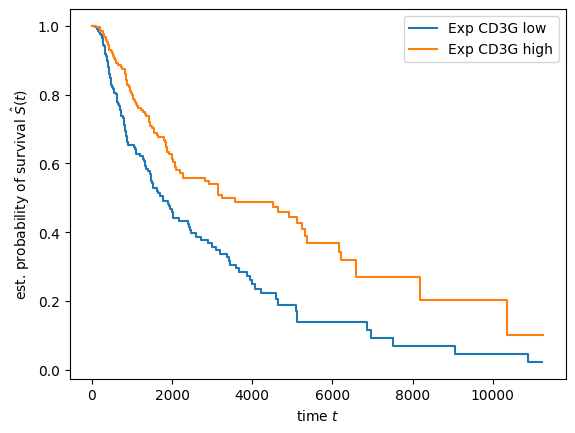

In [54]:
for gene_exp in ('low', 'high'):
    mask_exp = survivalData[gene_id] == gene_exp
    time_exp, survival_prob_exp = kaplan_meier_estimator(
        survivalData["Status"][mask_exp],
        survivalData['OS.time'][mask_exp])

    plt.step(time_exp, survival_prob_exp, where="post",
             label="Exp CD3G %s" % gene_exp)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

7) A l'aide de la fonction `compare_survival`déterminer si la différence observée semble significative.

In [75]:
survivalData_array = survivalData[['Status','OS.time']].to_records(index=False)
compare_survival(survivalData_array, survivalData[[gene_id]].to_numpy())

(np.float64(19.508312438716132), np.float64(1.0016286348874325e-05))

In [73]:
help(compare_survival)

Help on function compare_survival in module sksurv.compare:

compare_survival(y, group_indicator, return_stats=False)
    K-sample log-rank hypothesis test of identical survival functions.
    
    Compares the pooled hazard rate with each group-specific
    hazard rate. The alternative hypothesis is that the hazard
    rate of at least one group differs from the others at some time.
    
    See [1]_ for more details.
    
    Parameters
    ----------
    y : structured array, shape = (n_samples,)
        A structured array containing the binary event indicator
        as first field, and time of event or time of censoring as
        second field.
    
    group_indicator : array-like, shape = (n_samples,)
        Group membership of each sample.
    
    return_stats : bool, optional, default: False
        Whether to return a data frame with statistics for each group
        and the covariance matrix of the test statistic.
    
    Returns
    -------
    chisq : float
        Test

8) A l'aide d'une boucle for, répétez maintenant ce test pour l'ensemble des gènes du chromosome 11. Ne tester que les gènes dont l'expression est détectée dans au moins 10 patients.

In [80]:
res = []
new_cols = {}  # Dictionary to store new columns

for g in smpCounts.index:
    x = smpCounts.loc[g]
    if np.count_nonzero(x) > 10:
        y = survivalData["OS.time"]
        new_cols[g] = ['high' if i > np.median(x) else 'low' for i in x]
        
        survivalData_array = survivalData[['Status', 'OS.time']].to_records(index=False)
        stat, p = compare_survival(survivalData_array, np.array(new_cols[g]))
        
        res.append([g, stat, p])

In [124]:
survivalDataChr11 = pd.concat([survivalData[["OS","_PATIENT","OS.time","Status"]], pd.DataFrame(new_cols,index=survivalData.index)], axis=1)
survivalDataChr11

,OS,_PATIENT,OS.time,Status,ENSG00000224777.3,ENSG00000270921.1,ENSG00000230724.8,ENSG00000255229.1,ENSG00000177951.16,ENSG00000188076.2,...,ENSG00000151498.10,ENSG00000166105.14,ENSG00000254442.1,ENSG00000149328.13,ENSG00000109956.11,ENSG00000255545.6,ENSG00000254573.1,ENSG00000255344.1,ENSG00000251226.1,ENSG00000255327.1
TCGA-EE-A2GJ-06A,1,TCGA-EE-A2GJ,2270,True,low,low,high,low,low,low,...,low,low,low,low,low,low,low,low,low,low
TCGA-EE-A2GI-06A,0,TCGA-EE-A2GI,1482,False,low,low,low,low,high,low,...,low,low,low,low,low,low,low,low,high,low
TCGA-WE-A8ZM-06A,0,TCGA-WE-A8ZM,3082,False,low,high,high,low,low,low,...,low,high,low,low,high,low,low,low,low,low
TCGA-DA-A1IA-06A,1,TCGA-DA-A1IA,2005,True,low,low,low,high,high,low,...,low,high,low,low,high,high,low,low,high,low
TCGA-D3-A51H-06A,0,TCGA-D3-A51H,1714,False,low,high,high,low,low,low,...,low,high,low,low,high,high,low,low,high,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-FR-A8YC-06A,1,TCGA-FR-A8YC,1059,True,low,high,high,low,low,low,...,high,low,low,low,low,high,low,low,high,low
TCGA-EB-A4XL-01A,0,TCGA-EB-A4XL,777,False,low,high,high,low,high,low,...,high,high,low,high,low,low,low,low,low,low
TCGA-EB-A551-01A,0,TCGA-EB-A551,590,False,low,high,high,low,high,high,...,low,high,high,high,high,high,high,low,high,low
TCGA-EE-A3J4-06A,1,TCGA-EE-A3J4,3869,True,low,low,high,low,high,high,...,high,low,low,low,low,low,low,low,low,low


In [113]:
biomarkerResults = pd.DataFrame(res, columns = ['Ensembl_ID',"stat","p_value"])
biomarkerResults["gene_name"] = geneAnnotations["gene"].loc[biomarkerResults["Ensembl_ID"]].to_list()

9) Combien de gènes du chromosme 11 semblent à priori être prédictifs de la survie des patients (p-valeur < 0.05)? Peut-on retenir cette liste telle quelle?

In [114]:
## A compléter
biomarkerResults[biomarkerResults["p_value"]< 0.05]

,Ensembl_ID,stat,p_value,gene_name
4,ENSG00000177951.16,5.615021,0.017807,BET1L
11,ENSG00000174885.11,20.040423,0.000008,NLRP6
12,ENSG00000255026.1,6.060273,0.013826,RP11-326C3.2
13,ENSG00000142102.14,13.438443,0.000247,ATHL1
16,ENSG00000185201.15,8.611873,0.003340,IFITM2
...,...,...,...,...
2715,ENSG00000166106.3,4.825007,0.028050,ADAMTS15
2734,ENSG00000279497.1,3.979641,0.046053,RP11-654C20.1
2752,ENSG00000151500.13,11.827851,0.000584,THYN1
2754,ENSG00000166105.14,3.854245,0.049620,GLB1L3


## Question bonus (à regarder chez vous, pas à l'examen): 

10) Effectuer la correction de Benjamin et Hotchberg sur ces résultats. Combien restent-t'ils de résultats significatifs?


In [125]:
biomarkerResults = biomarkerResults.sort_values("p_value")
biomarkerResults["corrected_threshold"]=[(r/len(biomarkerResults))*0.05 for r in range(len(biomarkerResults)+1)[1:]]
biomarkerResults['H0 rejected'] = biomarkerResults['p_value'] < biomarkerResults['corrected_threshold']
biomarkerResults[biomarkerResults['H0 rejected']]

,Ensembl_ID,stat,p_value,gene_name,corrected_threshold,H0 rejected
1906,ENSG00000254965.1,27.676464,1.433968e-07,RP11-113K21.2,0.000018,True
1297,ENSG00000133321.9,25.031287,5.640753e-07,RARRES3,0.000036,True
18,ENSG00000185885.14,24.656842,6.850111e-07,IFITM1,0.000054,True
263,ENSG00000132274.14,24.603914,7.040859e-07,TRIM22,0.000072,True
2148,ENSG00000023445.12,24.547776,7.248998e-07,BIRC3,0.000090,True
...,...,...,...,...,...,...
2612,ENSG00000165478.6,9.877512,1.673110e-03,HEPACAM,0.001719,True
2144,ENSG00000243777.1,9.845892,1.702114e-03,RP11-864G5.1,0.001737,True
1081,ENSG00000172362.2,9.807478,1.738037e-03,OR5B12,0.001755,True
66,ENSG00000177700.5,9.804806,1.740564e-03,POLR2L,0.001773,True


11) Est ce que les expressions des autres gènes du complexe CD3 des cellules T sont predictives de la survie des patients? Tracer les courbes de survies associées.

In [116]:
CD3_genes = [i for i in biomarkerResults["gene_name"] if i.startswith('CD3')]

In [117]:
biomarkerResults[biomarkerResults["gene_name"].isin(CD3_genes)]

,Ensembl_ID,stat,p_value,gene_name,corrected_threshold,H0 rejected
2432,ENSG00000167286.8,20.992354,0.000005,CD3D,0.000181,True
2433,ENSG00000160654.8,19.508312,0.000010,CD3G,0.000326,True
2430,ENSG00000198851.8,14.704992,0.000126,CD3E,0.000670,True


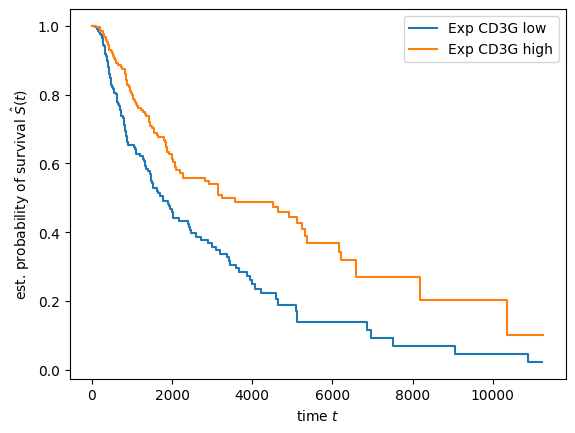

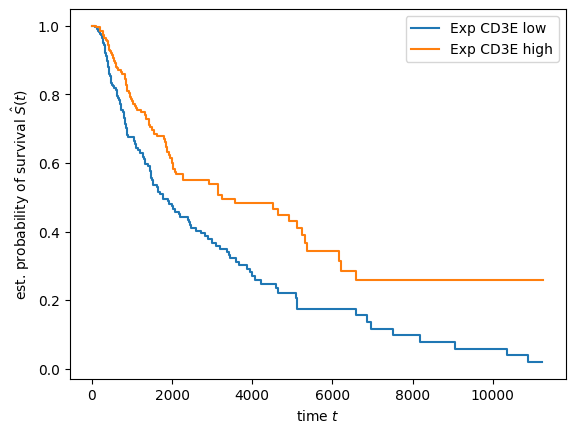

In [126]:
for gene_name in ["CD3G","CD3E"]:
    gene_id = geneAnnotations[geneAnnotations["gene"]==gene_name].index[0]
    survivalData[gene_id] = ['high' if i > np.median(smpCounts.loc[gene_id]) else 'low' for i in smpCounts.loc[gene_id]]
    for gene_exp in ('low', 'high'):
        mask_exp = survivalData[gene_id] == gene_exp
        time_exp, survival_prob_exp = kaplan_meier_estimator(
            survivalData["Status"][mask_exp],
            survivalData['OS.time'][mask_exp])

        plt.step(time_exp, survival_prob_exp, where="post",
             label="Exp "+gene_name +" %s" % gene_exp)

    plt.ylabel("est. probability of survival $\hat{S}(t)$")
    plt.xlabel("time $t$")
    plt.legend(loc="best")
    plt.show()

Répéter cette analyse mais cette fois ci en distinguant les différents types d'echantillons. Vous aurez besoin de charger le tableau des données cliniques: `"../UCSC_data/TCGA-SKCM.GDC_phenotype.tsv"`


In [127]:
clinicalData = pd.read_table("../UCSC_data/TCGA-SKCM.GDC_phenotype.tsv")
clinicalData = clinicalData.set_index("submitter_id.samples",drop = False)
survivalDataChr11["sample_type"] = clinicalData.loc[survivalDataChr11.index,"sample_type.samples"]

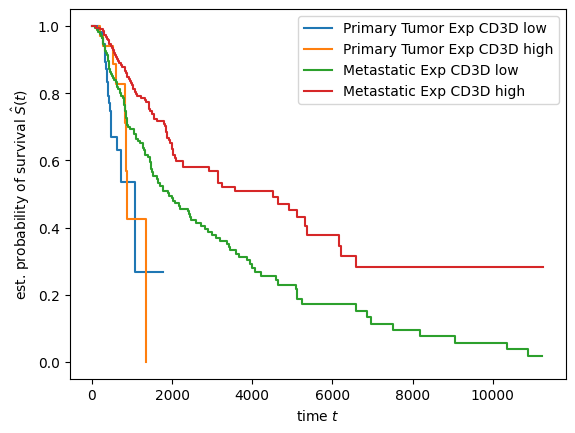

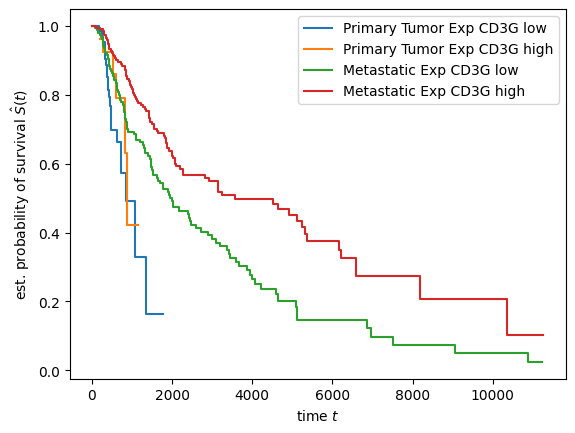

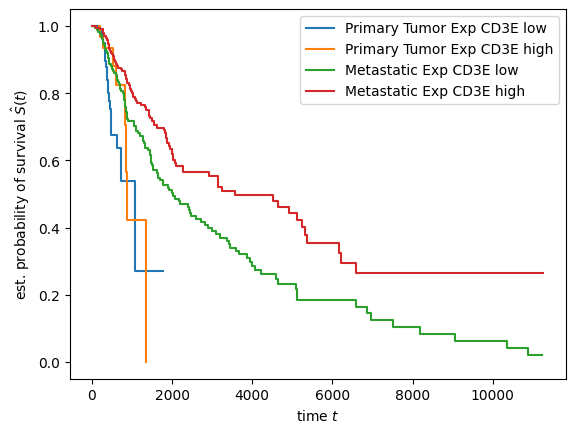

In [128]:
for gene_name in ["CD3D","CD3G","CD3E"]:
    gene_id = geneAnnotations[geneAnnotations["gene"]==gene_name].index[0]
    for smp_type in ('Primary Tumor', 'Metastatic'):
        survivalDataSmp = survivalDataChr11[survivalDataChr11["sample_type"] == smp_type]
        for gene_exp in ('low', 'high'):
            # Ensure that survivalDataSmp[gene_id] is treated as a Series, not DataFrame
            mask_exp = survivalDataSmp[gene_id].astype(str) == gene_exp

            time_exp, survival_prob_exp = kaplan_meier_estimator(
                survivalDataSmp["Status"][mask_exp],
                survivalDataSmp['OS.time'][mask_exp])

            plt.step(time_exp, survival_prob_exp, where="post",
                     label=smp_type+" Exp "+gene_name +" %s" % gene_exp)

    plt.ylabel("est. probability of survival $\hat{S}(t)$")
    plt.xlabel("time $t$")
    plt.legend(loc="best")
    plt.show()

In [109]:
survivalDataSmp

,OS,_PATIENT,OS.time,Status,ENSG00000160654.8,ENSG00000224777.3,ENSG00000270921.1,ENSG00000230724.8,ENSG00000255229.1,ENSG00000177951.16,...,ENSG00000166105.14,ENSG00000254442.1,ENSG00000149328.13,ENSG00000109956.11,ENSG00000255545.6,ENSG00000254573.1,ENSG00000255344.1,ENSG00000251226.1,ENSG00000255327.1,sample_type
TCGA-BF-A5EP-01A,0,TCGA-BF-A5EP,335,False,low,low,low,high,low,high,...,low,low,high,high,high,low,low,high,low,Primary Tumor
TCGA-BF-AAP6-01A,0,TCGA-BF-AAP6,325,False,low,low,low,high,low,high,...,low,low,high,low,low,low,low,high,low,Primary Tumor
TCGA-XV-A9W5-01A,0,TCGA-XV-A9W5,392,False,low,low,low,high,low,low,...,high,low,high,low,low,low,low,high,low,Primary Tumor
TCGA-ER-A42H-01A,1,TCGA-ER-A42H,426,True,low,low,low,high,low,low,...,low,low,high,high,low,low,low,high,low,Primary Tumor
TCGA-EB-A44P-01A,0,TCGA-EB-A44P,741,False,low,low,high,high,high,high,...,high,low,high,high,high,low,low,low,low,Primary Tumor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-EB-A41B-01A,0,TCGA-EB-A41B,291,False,low,low,low,high,low,high,...,high,low,high,high,high,low,low,low,low,Primary Tumor
TCGA-EB-A553-01A,0,TCGA-EB-A553,226,False,low,low,low,low,low,low,...,low,low,high,low,low,low,low,low,low,Primary Tumor
TCGA-BF-A5EQ-01A,0,TCGA-BF-A5EQ,323,False,high,low,low,low,low,low,...,low,low,low,low,low,low,low,high,high,Primary Tumor
TCGA-EB-A4XL-01A,0,TCGA-EB-A4XL,777,False,high,low,high,high,low,high,...,high,low,high,low,low,low,low,low,low,Primary Tumor


Afficher ces courbes de survies uniquement pour les échantillons de tumeurs primaires

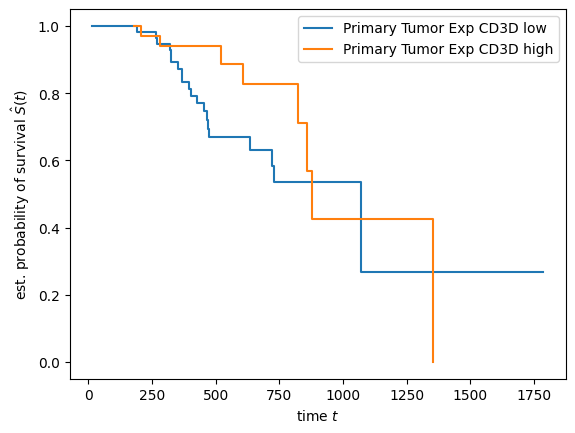

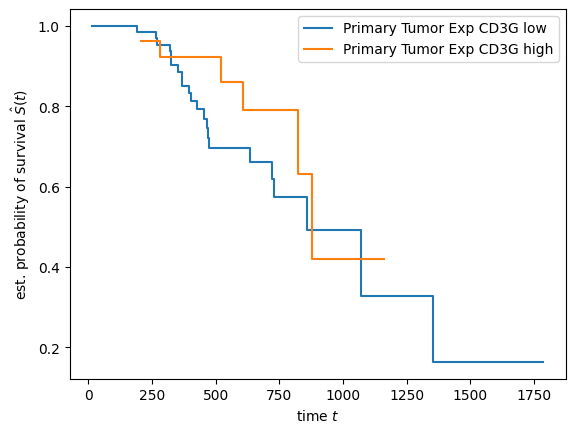

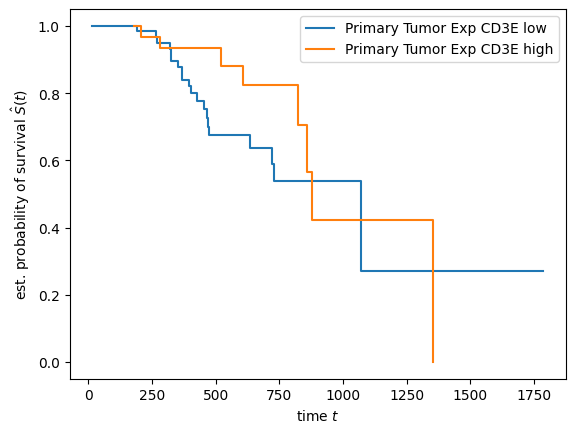

In [129]:
smp_type = "Primary Tumor"
survivalDataChr11 = survivalDataChr11[survivalData["sample_type"] == smp_type]
for gene_name in ["CD3D","CD3G","CD3E"]:
    gene_id = geneAnnotations[geneAnnotations["gene"]==gene_name].index[0]
    smp_type = 'Primary Tumor'
    survivalDataSmp = survivalDataChr11[survivalDataChr11["sample_type"] == smp_type]
    for gene_exp in ('low', 'high'):
        mask_exp = survivalDataSmp[gene_id] == gene_exp
        time_exp, survival_prob_exp = kaplan_meier_estimator(
            survivalDataSmp["Status"][mask_exp],
            survivalDataSmp['OS.time'][mask_exp])

        plt.step(time_exp, survival_prob_exp, where="post",
                 label=smp_type+" Exp "+gene_name +" %s" % gene_exp)

    plt.ylabel("est. probability of survival $\hat{S}(t)$")
    plt.xlabel("time $t$")
    plt.legend(loc="best")
    plt.show()